In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [119]:
data = pd.read_csv("steamdata_clean.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26040 entries, 0 to 26039
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                26040 non-null  object 
 1   steam_appid         26040 non-null  int64  
 2   controller_support  26040 non-null  int64  
 3   dlc                 26040 non-null  int64  
 4   short_description   26026 non-null  object 
 5   demos               26040 non-null  int64  
 6   platforms           26040 non-null  object 
 7   movies              26040 non-null  int64  
 8   achievements        26040 non-null  int64  
 9   release_date        26039 non-null  object 
 10  genres              26040 non-null  object 
 11  developer           26040 non-null  object 
 12  publisher           26040 non-null  object 
 13  owners              26040 non-null  object 
 14  average_forever     26040 non-null  int64  
 15  median_forever      26040 non-null  int64  
 16  init

In [120]:
# fill null with blank descriptions
data["short_description"] = data["short_description"].fillna("")

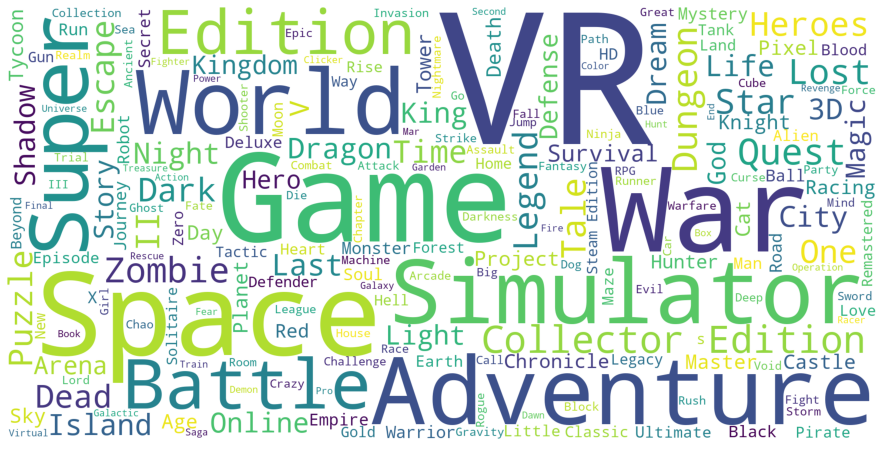

In [121]:
# fancy word clouds to see commonly used words in game titles and descriptions

from wordcloud import WordCloud, STOPWORDS

name_corpus = ' '.join(data["name"])
name_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 1000, width = 2000).generate(name_corpus)
plt.figure(figsize=(16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

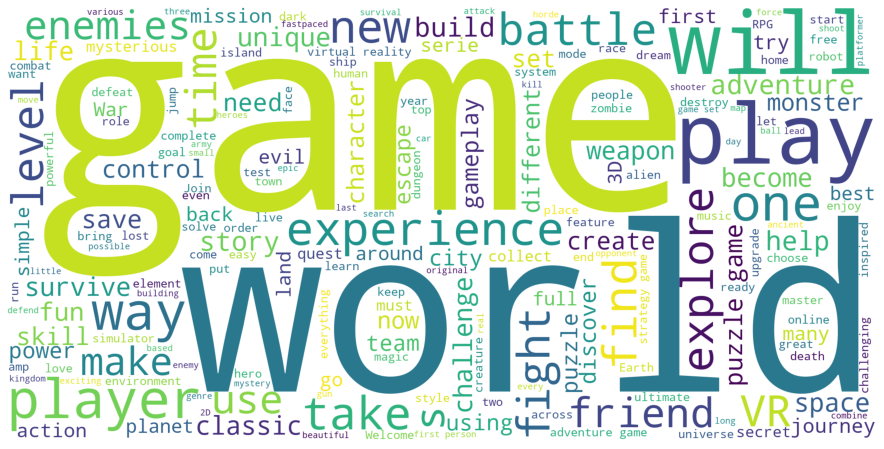

In [122]:
# TODO: clean the text data better
import re
import string

description_corpus = ' '.join(data["short_description"])
words = description_corpus.split()
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in words]
description_corpus = ' '.join(stripped)

description_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 1000, width = 2000).generate(description_corpus)
plt.figure(figsize=(16,8))
plt.imshow(description_wordcloud)
plt.axis('off')
plt.show()

In [123]:
genres_count = pd.DataFrame(data.genres.str.split(', ').explode().value_counts()).reset_index()
genres_count.columns = ["genre", "genre_count"]
genres_count.head(5)

,genre,genre_count
0,Indie,18475
1,Action,11483
2,Casual,9630
3,Adventure,9280
4,Strategy,5057


<AxesSubplot:xlabel='genre_count', ylabel='genre'>

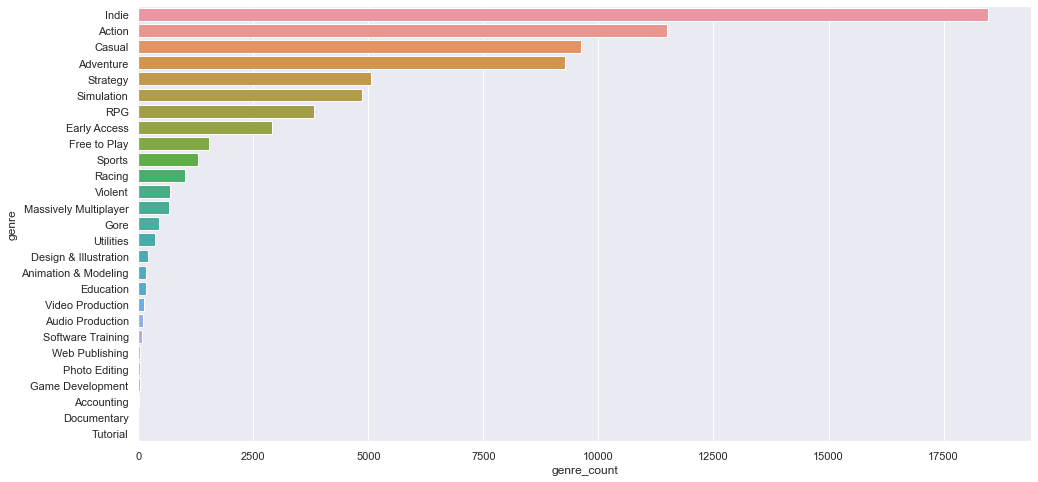

In [124]:
f = plt.figure(figsize=(16, 8))
sb.barplot(x = "genre_count", y = "genre", data = genres_count)

<AxesSubplot:xlabel='tags_count', ylabel='tags'>

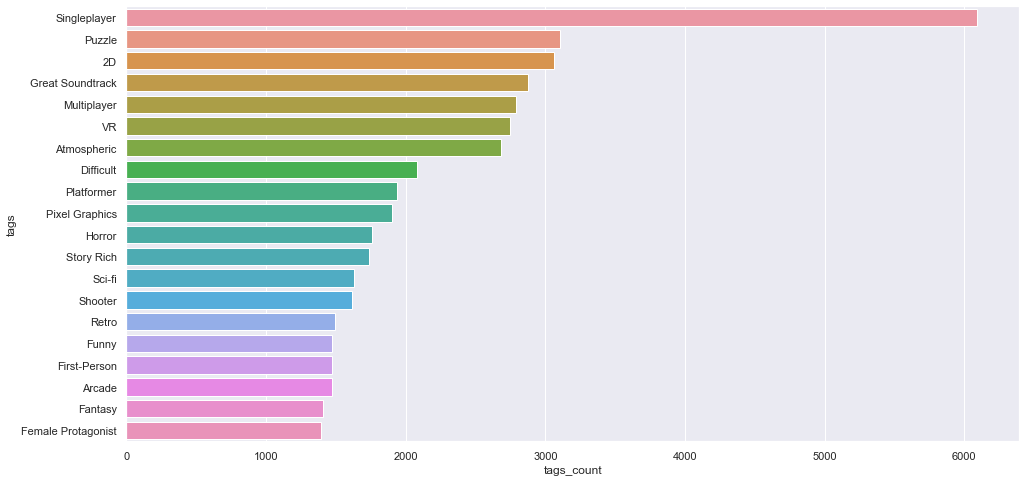

In [125]:
tags_count = pd.DataFrame(data.additional_tags.str.split(', ').explode().value_counts()).reset_index()
tags_count.columns = ["tags", "tags_count"]
f = plt.figure(figsize=(16, 8))
sb.barplot(x = "tags_count", y = "tags", data = tags_count.head(20))

In [126]:
data["rating"].describe()

count    26040.000000
mean        52.375442
std         25.275950
min          0.000000
25%         34.075000
50%         54.900000
75%         73.100000
max         98.600000
Name: rating, dtype: float64

<AxesSubplot:>

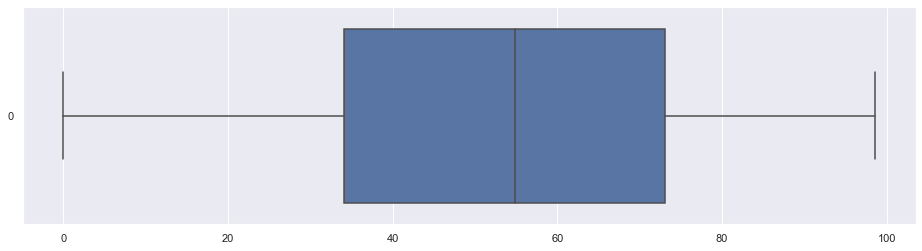

In [132]:
f = plt.figure(figsize=(16, 4))
sb.boxplot(data = data["rating"], orient = 'h')

In [127]:
data[["name", "rating", "owners", "release_date"]].sort_values("rating", ascending = False).head(20)

,name,rating,owners,release_date
23,Portal 2,98.6,"10,000,000 .. 20,000,000",2011-04-18
7481,Factorio,98.4,"1,000,000 .. 2,000,000",2016-02-25
7629,Aseprite,98.3,"50,000 .. 100,000",2016-02-22
2293,One Finger Death Punch,98.0,"500,000 .. 1,000,000",2014-03-03
7047,TY the Tasmanian Tiger,97.8,"50,000 .. 100,000",2016-12-12
17,Portal,97.8,"10,000,000 .. 20,000,000",2007-10-10
7313,OneShot,97.8,"200,000 .. 500,000",2016-12-08
4317,Finding Paradise,97.8,"200,000 .. 500,000",2017-12-14
7417,Iron Snout,97.8,"1,000,000 .. 2,000,000",2016-01-27
2043,A Hat in Time,97.7,"200,000 .. 500,000",2017-10-05
